# Writing Reusable Code using Functions in Python

In [1]:
def saytoday() :
    print("Today is good")

In [2]:
saytoday()

Today is good


In [8]:
def filter_even() :
    result_list=[]
    for i in range(100) :
        if i%2 == 1 :
            result_list.append(i)
    return result_list


In [9]:
print(filter_even())

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]


#### Local variables and scope

In [11]:
def emi_calculator(amount, duration
                  ) :
    emi=amount/duration
    print("The emi for {} month is {}" .format(duration,emi))

In [12]:
emi_calculator(9000000,12)

The emi for 12 month is 750000.0


In [13]:
emi

NameError: name 'emi' is not defined

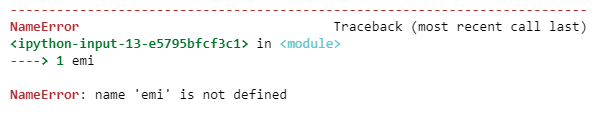

Here , **emi** is local to function . so outside the function . it is not accessable

#### optional argument

In [19]:
# down_payment is optional
def emi_calculator(amount, duration, down_payment=0 ) :
    loan_amount=amount-down_payment
    emi=loan_amount/duration
    print("The emi for {} month is {}" .format(duration,emi))

In [20]:
emi_calculator(3000000, 12 ) 

The emi for 12 month is 250000.0


In [21]:
emi_calculator(3000000, 12, 50000 ) 

The emi for 12 month is 245833.33333333334


In [1]:
# working with in built module and libriray
import math

In [2]:
math.ceil(2.3456)

3

In [3]:
math.sqrt(2)

1.4142135623730951

In [4]:
math.isqrt(3)

1

In [5]:
math.isqrt(1)

1

In [6]:
math.isqrt(9)

3

In [7]:
math.comb(89)

TypeError: comb expected 2 arguments, got 1

In [1]:
# return statement
def emi_calculator(amount, duration, down_payment=0 ) :
    loan_amount=amount-down_payment
    emi=loan_amount/duration
    return emi

In [4]:
emi1=emi_calculator(3000000, 12, 50000 ) 

print("The emi for {} " .format(emi1))

The emi for 245833.33333333334 


In [7]:
import math
def loan_emi(amount, duration, rate, down_payment=0):
    loan_amount = amount - down_payment
    emi = loan_amount * rate * ((1+rate)**duration) / (((1+rate)**duration)-1)
    emi = math.ceil(emi)
    return emi
emi_with_interest = loan_emi(amount=100000, duration=10*12, rate=0.09/12)
emi_with_interest

1267

In [8]:
# Exception
emi_with_interest = loan_emi(amount=100000, duration=10*12, rate=0.0/12)
emi_with_interest

ZeroDivisionError: float division by zero

In [17]:

import math
def loan_emi(amount, duration, rate, down_payment=0):
    """Calculates the equal montly installment (EMI) for a loan.
    
    Arguments:
        amount - Total amount to be spent (loan + down payment)
        duration - Duration of the loan (in months)
        rate - Rate of interest (monthly)
        down_payment (optional) - Optional intial payment (deducted from amount)
    """
    loan_amount = amount - down_payment
    try:
        emi = loan_amount * rate * ((1+rate)**duration) / (((1+rate)**duration)-1)
    except ZeroDivisionError:
        emi= loan_amount/duration
    emi = math.ceil(emi)
    return emi


In [16]:

    emi_with_interest= loan_emi(amount=100000, duration=10*12, rate=0.0/12)
    emi_with_interest


834

In [18]:
help(loan_emi)

Help on function loan_emi in module __main__:

loan_emi(amount, duration, rate, down_payment=0)
    Calculates the equal montly installment (EMI) for a loan.
    
    Arguments:
        amount - Total amount to be spent (loan + down payment)
        duration - Duration of the loan (in months)
        rate - Rate of interest (monthly)
        down_payment (optional) - Optional intial payment (deducted from amount)



## Exercise - Data Analysis for Vacation Planning

You're planning a vacation, and you need to decide which city you want to visit. You have shortlisted four cities and identified the return flight cost, daily hotel cost, and weekly car rental cost. While renting a car, you need to pay for entire weeks, even if you return the car sooner.


| City | Return Flight (`$`) | Hotel per day (`$`) | Weekly Car Rental  (`$`) | 
|------|--------------------------|------------------|------------------------|
| Paris|       200                |       20         |          200           |
| London|      250                |       30         |          120           |
| Dubai|       370                |       15         |          80           |
| Mumbai|      450                |       10         |          70           |         


Answer the following questions using the data above:

1. If you're planning a 1-week long trip, which city should you visit to spend the least amount of money?
2. How does the answer to the previous question change if you change the trip's duration to four days, ten days or two weeks?
3. If your total budget for the trip is `$1000`, which city should you visit to maximize the duration of your trip? Which city should you visit if you want to minimize the duration?
4. How does the answer to the previous question change if your budget is `$600`, `$2000`, or `$1500`?

*Hint: To answer these questions, it will help to define a function `cost_of_trip` with relevant inputs like flight cost, hotel rate, car rental rate, and duration of the trip. You may find the `math.ceil` function useful for calculating the total cost of car rental.*

In [53]:
paris_hotel_cost=20
lodon_hotel_cost=30
dubai_hotel_cost=15
mumbai_hotel_cost=10

paris_flight_cost=200
lodon_flight_cost=250
dubai_flight_cost=370
mumbai_flight_cost=450

paris_car_cost=200
lodon_car_cost=120
dubai_car_cost=80
mumbai_car_cost=70

number_of_days=0

def trip_cost_by_flight(hotel,flight, number_of_days,car_rent) :
    no_of_week=1+(number_of_days//7)
    cost_of_hotel=hotel*number_of_days
    cost_of_trip=flight+(car_rent*no_of_week)+cost_of_hotel
    return cost_of_trip

     
     
number_of_days=int(input("Enter the number of days for trip : " )    )
trip_to_paris_by_flight=trip_cost_by_flight(paris_hotel_cost,paris_flight_cost, number_of_days,paris_car_cost)
trip_to_lodon_flight=trip_cost_by_flight(lodon_hotel_cost,lodon_flight_cost,number_of_days,lodon_car_cost)
trip_to_dubai_flight=trip_cost_by_flight(dubai_hotel_cost,dubai_flight_cost,number_of_days,dubai_car_cost)
trip_to_mumbai_flight=trip_cost_by_flight(mumbai_hotel_cost,mumbai_flight_cost,number_of_days,mumbai_car_cost)






Enter the number of days for trip : 10


In [54]:
# 1st and 2nd question
cost_of_the_trip=[trip_to_paris_by_flight,trip_to_lodon_flight,trip_to_dubai_flight,trip_to_mumbai_flight]
city=['paris','london','dubai','mumbai']
cost_of_the_trip



[800, 790, 680, 690]

In [55]:
least_cost= min(cost_of_the_trip)
index=cost_of_the_trip.index(min(cost_of_the_trip))
print("Least expense cost of trip is {} and city is {}".format(min(cost_of_the_trip),city[index]))

Least expense cost of trip is 680 and city is dubai


In [70]:
# 3rd and 4th question
def cost_of_trip_atleast_budget(budget) :
    min_budget=0
    number_of_days=0
    while min_budget<=budget :  
        number_of_days = number_of_days+1
        trip_to_paris_by_flight=trip_cost_by_flight(paris_hotel_cost,paris_flight_cost, number_of_days,paris_car_cost)
        trip_to_lodon_flight=trip_cost_by_flight(lodon_hotel_cost,lodon_flight_cost,number_of_days,lodon_car_cost)
        trip_to_dubai_flight=trip_cost_by_flight(dubai_hotel_cost,dubai_flight_cost,number_of_days,dubai_car_cost)
        trip_to_mumbai_flight=trip_cost_by_flight(mumbai_hotel_cost,mumbai_flight_cost,number_of_days,mumbai_car_cost)
        cost_of_the_trip=[trip_to_paris_by_flight,trip_to_lodon_flight,trip_to_dubai_flight,trip_to_mumbai_flight]
        city=['paris','london','dubai','mumbai']
        least_cost= min(cost_of_the_trip)
        index=cost_of_the_trip.index(min(cost_of_the_trip))
        min_budget==budget
        if least_cost==budget :
            print("The trip to {} for {} days in the budget of {}".format(city[index],number_of_days,budget))

In [ ]:
budget=int(input("enter the budget is : "))
cost_of_trip_atleast_budget(budget)

enter the budget is : 1000
The trip to mumbai for 27 days in the budget of 1000
